In [541]:
path_timesheet = './timesheet-system-2.xlsx'
path_project_task_system_1 = './project.task-system-1.xls'
path_project_task_system_2 = './project.task-system-2.xlsx'

In [2]:
import pandas as pd
import os

In [543]:
df_timesheet = pd.read_excel(path_timesheet)

In [544]:
len(df_timesheet)

198898

In [545]:
df_timesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198898 entries, 0 to 198897
Data columns (total 13 columns):
Project/Display Name            198898 non-null object
Task/ID                         198898 non-null int64
Task/Start Date                 97700 non-null datetime64[ns]
Task/Display Name               198837 non-null object
Task/Task Type                  198837 non-null object
Task/Description                67348 non-null object
Task/Initially Planned Hours    151141 non-null float64
Date                            198898 non-null datetime64[ns]
User/Name                       198898 non-null object
Task/Total Hours                50109 non-null float64
Is Billable                     198898 non-null object
Description                     198541 non-null object
Quantity                        198898 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 19.7+ MB


In [546]:
df_timesheet = df_timesheet.dropna(subset=['Description'])
df_timesheet = df_timesheet.dropna(subset=['Task/Description'])

In [547]:
df_work = df_timesheet[['Project/Display Name', 'Task/Description', 'Description', 'Quantity', 'Date']]

In [548]:
os.remove('./before_soup.csv')
df_work.to_csv('./before_soup.csv', index=False)

In [549]:
df_work.head()

,Project/Display Name,Task/Description,Description,Quantity,Date
53,Bista General,<p>with oen qty and price variation</p>,TPH:Verification of utl and tph data for sale_...,8.0,2016-01-15
56,TPH,<p>v</p>,Update sale and invoice data with new tax data...,9.0,2016-01-15
59,TPH,<p>1) find out relation of ult tables like pro...,worked on internal transfer t fix the move typ...,8.0,2016-01-15
80,Edelweiss POC,<p>Cumulative pending balance</p>,"log reports,query design,template design,deplo...",8.0,2016-01-15
86,TPH,<p>1) find out relation of ult tables like pro...,working on the sale order functionality same a...,8.0,2016-01-15


In [550]:
df_work['Task/Description'].iloc[0]

'<p>with oen qty and price variation</p>'

In [551]:
l = df_work['Task/Description'].iloc[0]
l

'<p>with oen qty and price variation</p>'

In [552]:
soup = BeautifulSoup(l, 'html.parser')
soup.get_text()

'with oen qty and price variation'

In [553]:
col_interested = ['Task/Description', 'Description']

In [554]:
def html_process(l):
    soup = BeautifulSoup(l, 'html.parser')
    return soup.get_text()

In [555]:
from bs4 import BeautifulSoup


In [556]:
df_work['Task/Description'] = df_work['Task/Description'].apply(html_process)
df_work['Description'] = df_work['Description'].apply(html_process)

/home/jubaer/anaconda3/envs/albert/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jubaer/anaconda3/envs/albert/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [557]:
os.remove('./before_cleaner.csv')
df_work.to_csv('./before_cleaner.csv', index=False)

In [558]:
df_work.iloc[1]['Description']

'Update sale and invoice data with new tax data, add migration script for account tax, Run customer payment jobs in dbsql'

In [559]:
bad_ind = []

In [560]:
for ind in range(len(df_work)):
    tsk = df_work.iloc[ind]['Task/Description']
    dsc = df_work.iloc[ind]['Description']
    
    if tsk == '' or dsc == '':
        bad_ind.append(ind)
        
    

In [561]:
df_work.drop(df_work.index[bad_ind], inplace=True)

In [564]:
import re

In [565]:
def cleaner(data):
    
    img_cleaner = re.compile('<img.*>|<img.*|image.*png.*?|image.*?jpeg.*?')
    symbole_cleaner = re.compile('[^a-zA-Z]')
    www_cleaner = re.compile('www.*com')
    doc_cleaner = re.compile('docs .*edit')
    http_cleaner = re.compile('http.*Database|http.*database|http.*com|https.*com|https.*youtu.*be|https.*gid|http.*gid|https.*Database|http.*aimstaging|http.*db|http.*io|https.*io|https.*sharing|https.*modules')
    clean_txt = re.sub(img_cleaner, '', data)
    clean_txt = re.sub(symbole_cleaner, ' ', clean_txt)
    clean_txt = re.sub(www_cleaner, '', clean_txt)
    clean_txt = re.sub(doc_cleaner, '', clean_txt)
    clean_txt = re.sub(http_cleaner, '', clean_txt)
    clean_txt = clean_txt.split()
    clean_txt = ' '.join(clean_txt)
    return clean_txt.lower()

In [566]:
line = 'To www                     blala lalala com 123456789check http balchal com low stock https balchal com Module  Ref   https test watch v b duMHOErTc feature youtu beWe need to have report for product expiry in certain days              This should be filtered in List list view  List view has download to xls feature '

In [567]:
# test_line = 'The sky is <blue> not green'

In [568]:
# test_match = re.compile('http.*com|https.*com|https.*youtu.*be')

In [569]:
# re.sub(test_match, '', line)

In [570]:
cleaner(line)

'to module ref filtered in list list view list view has download to xls feature'

In [571]:
df_work['Task/Description'] = df_work['Task/Description'].apply(cleaner)

/home/jubaer/anaconda3/envs/albert/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [572]:
df_work['Description'] = df_work['Description'].apply(cleaner)

/home/jubaer/anaconda3/envs/albert/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [573]:
os.remove('./task_clean.csv')
df_work.to_csv('./task_clean.csv', index=False)

In [574]:
df_work = pd.read_csv('./task_clean.csv')

In [719]:
len(df_work['Task/Description'].unique())

4120

In [745]:
len(df_work)

29692

In [576]:
df_work_dup_summed = df_work.groupby(['Project/Display Name','Task/Description'])['Quantity'].sum().reset_index()

In [577]:
len(df_work_dup_summed)

4142

In [578]:
os.remove('./groupby_pro_disp__task_des_sum_quant.csv')
df_work_dup_summed.to_csv('./groupby_pro_disp__task_des_sum_quant.csv', index=False)

In [579]:
df_work_dup_summed

,Project/Display Name,Task/Description,Quantity
0,180 Smoke - Closed,auto populate the latest expiry date and allow...,2.00
1,180 Smoke - Closed,barcode scanning implementation onboarding pro...,41.90
2,180 Smoke - Closed,columnssequence picking scheduled date state b...,7.00
3,180 Smoke - Closed,fedexcanada postpurolator,921.25
4,180 Smoke - Closed,inventory adjustment should work each location...,11.00
...,...,...,...
4137,ZingBang Support,tickets a created and closed ticket for datali...,6.00
4138,ZingBang Support,url ec admin alldaymall com magento started th...,3.00
4139,ZingBang Support,url name ec admin alldaymall com ebay tested t...,2.00
4140,ZingBang Support,videos a watched video of mass editing b watch...,7.00


In [1]:
import numpy as np

In [581]:
round(0.0036, 3)

0.004

In [582]:
df_work_dup_summed['Quantity'] = df_work_dup_summed['Quantity'].apply(lambda x : round(x, 3))

In [583]:
uniq_quant = list(df_work_no_dup['Quantity'].unique())
min_quan = min(uniq_quant)
max_quan = max(uniq_quant)
max_quan

55.0

In [584]:
import matplotlib.pyplot as plt
%matplotlib inline

In [585]:
a = range(0, 11)
a

range(0, 11)

In [691]:
quant = np.array(df_work_dup_summed['Quantity'].values)

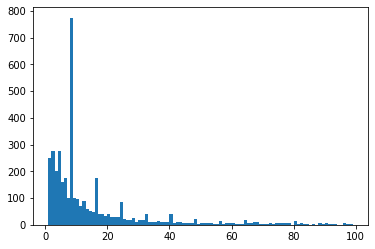

In [686]:
plt.hist(quant, bins=range(1, 100))
plt.show()

In [688]:
quant_df = pd.DataFrame({'quantity':quant})

In [689]:
quant_df.describe()

,quantity
count,4142.000000
mean,30.127097
std,182.058991
min,0.000000
25%,4.000000
50%,8.000000
75%,19.958250
max,10081.933000


In [694]:
len(quant[quant>50])

449

In [695]:
bad_quant_index = [i for i, l in enumerate(quant) if l < 1.0 or l > 50.0 ]

In [696]:
len(bad_quant_index)

541

In [684]:
max(quant), min(quant), np.mean(quant), np.std(quant)

(10081.933, 0.0, 30.12709657170449, 182.03701227798686)

In [588]:
freq, bin_range = np.histogram(quant, bins='auto')

In [589]:
len(bin_range)

75

In [590]:
sum(freq > 50)

10

1661

In [592]:
len(df_work_dup_summed)

4142

(array([ 215.,  606.,  668.,  394.,  605.,  225.,  217.,  115., 1053.,
          45.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

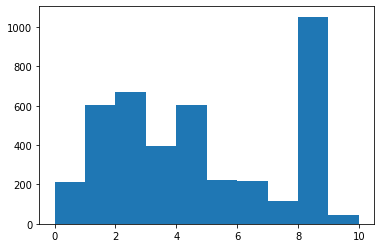

In [593]:
plt.hist(df_work_no_dup['Quantity'], bins=a)

In [594]:
# df_work.drop(df_work.index[bad_ind], inplace=True)

In [697]:
df_work_fewer_frequency_removed = df_work_dup_summed.drop(df_work_dup_summed.index[bad_quant_index], inplace=False)

In [698]:
os.remove('./dup_sum_low_freq_rem.csv')
df_work_fewer_frequency_removed.to_csv('./dup_sum_low_freq_rem.csv')

In [699]:
task_desc = df_work_fewer_frequency_removed['Task/Description'].values

In [700]:
task_desc_len =[len(l.split()) for l in task_desc]

In [ ]:
task_desc_len

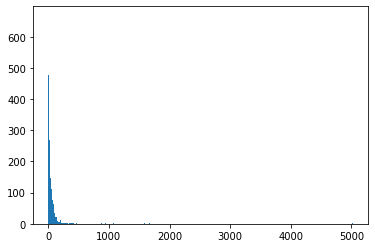

In [702]:
plt.hist(task_desc_len, bins='auto')
plt.show()

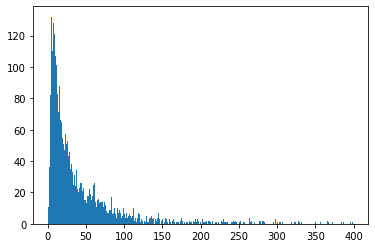

In [703]:
plt.hist(task_desc_len, bins=range(1,400))
plt.show()

In [704]:
df = pd.DataFrame({'des_len':task_desc_len})

In [705]:
df.describe()

,des_len
count,3601.000000
mean,49.605665
std,143.258335
min,1.000000
25%,10.000000
50%,22.000000
75%,54.000000
max,5020.000000


In [706]:
index_of_few_desc = [i for i, l in enumerate(task_desc_len) if l < 2 or l > 200]

In [707]:
max(task_desc_len)

5020

In [708]:
len(index_of_few_desc)

143

In [709]:
df_few_desc_rem = df_work_fewer_frequency_removed.drop(df_work_fewer_frequency_removed.index[index_of_few_desc], inplace=False)

In [710]:
len(df_few_desc_rem)

3458

In [711]:
max(df_few_desc_rem['Quantity'])

50.0

In [712]:
os.remove('./few_des_rem_few_quan_freq_removed.csv')
df_few_desc_rem.to_csv('./few_des_rem_few_quan_freq_removed.csv', index=False)

In [43]:
df_few_desc_rem = pd.read_csv('./few_des_rem_few_quan_freq_removed.csv')

In [67]:
df_few_desc_rem['Quantity'] = df_few_desc_rem['Quantity'].apply(lambda x : np.around(x, 1))

In [70]:
new_quant =df_few_desc_rem['Quantity'].values
len(df_few_desc_rem['Quantity'].unique())


220

In [74]:
new_quant[new_quant == 50.0]

array([50., 50., 50.])

In [72]:
# a

8.6

In [26]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

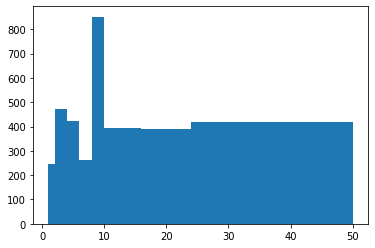

In [35]:
n, bins, _  = plt.hist(new_quant, histedges_equalN(new_quant, 9))

In [31]:
bins

array([ 1.,  2.,  4.,  6.,  8.,  8., 10., 16., 24., 50.])

In [32]:
patches

<a list of 9 Patch objects>

In [36]:
nn, nbin = np.histogram(new_quant, histedges_equalN(new_quant, 9))

In [39]:
nbin = list(nbin)
nbin

[1.0, 2.0, 4.0, 6.0, 8.0, 8.0, 10.0, 16.0, 24.0, 50.0]

In [10]:
range_1 = np.arange(1.0, 2.0, 0.1)
range_2 = np.arange(2.0, 3.0, 0.1)

In [11]:
range_1
range_2

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [16]:
# dict_task = {tuple(range_1):'task1', tuple(range_2):'task2'}

In [24]:
!pip install range-key-dict

In [25]:
from range_key_dict import RangeKeyDict

In [127]:
 task_range_dict = RangeKeyDict({
        (1.0, 4.0): 'task_1',
        (4.0, 8.0): 'task_2',
        (8.0, 9.0): 'task_3',
         (9.0, 16.0): 'task_4',
         (16.0, 24.0): 'task_5',
         (24.0, 51.0):'task_6'
    })

In [128]:
task_range_dict[7.857564]

'task_2'

In [129]:
task_label = []

In [130]:
for q in df_few_desc_rem['Quantity']:
    task_label.append(task_range_dict[q])

In [131]:
task_label_df = pd.DataFrame({'task_label':task_label})

https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib

In [126]:
task_label_df['task_label'].value_counts()

task_3    754
task_1    716
task_2    685
task_4    491
task_6    420
task_5    392
Name: task_label, dtype: int64

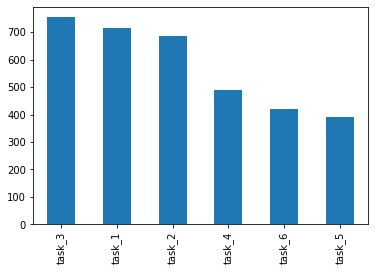

In [132]:
task_label_df['task_label'].value_counts().plot(kind='bar')

In [133]:
df_few_desc_rem['Task_Label'] = task_label

In [134]:
df_few_desc_rem.head()

,Project/Display Name,Task/Description,Quantity,Task_Label
0,180 Smoke - Closed,auto populate the latest expiry date and allow...,2.0,task_1
1,180 Smoke - Closed,barcode scanning implementation onboarding pro...,41.9,task_6
2,180 Smoke - Closed,columnssequence picking scheduled date state b...,7.0,task_2
3,180 Smoke - Closed,inventory adjustment should work each location...,11.0,task_4
4,180 Smoke - Closed,list of view of invoices with status and filte...,35.0,task_6


In [135]:
df_few_desc_rem.to_csv('./task_final_with_label.csv', index=False)

In [3]:
df_few_desc_rem = pd.read_csv('./task_final_with_label.csv')

In [4]:
df_few_desc_rem.head()

,Project/Display Name,Task/Description,Quantity,Task_Label
0,180 Smoke - Closed,auto populate the latest expiry date and allow...,2.0,task_1
1,180 Smoke - Closed,barcode scanning implementation onboarding pro...,41.9,task_6
2,180 Smoke - Closed,columnssequence picking scheduled date state b...,7.0,task_2
3,180 Smoke - Closed,inventory adjustment should work each location...,11.0,task_4
4,180 Smoke - Closed,list of view of invoices with status and filte...,35.0,task_6


In [5]:
X = df_few_desc_rem['Task/Description'].values
Y = df_few_desc_rem['Task_Label'].values

In [ ]:
X = list(X)
Y = list(Y)


In [7]:
len(X)

3458

https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

In [38]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /home/jubaer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jubaer/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [52]:
def text_process(x):
    l_1 = x.lower() #lowering
    l_2 = re.sub(r'\d+', '', l_1) #removing number
    l_3 = l_2.translate(str.maketrans("", "", string.punctuation)) #puncutation removed
    l_4 = l_3.strip() #whitespaces removed
    l_5 = word_tokenize(l_4) #tokenizing the sentence
    l_6 =  [i for i in l_5 if not i in stop_words] #removing stop words(frequent less meaningful word)
#     l_7 = [ stemmer.stem(i) for in l_6 ] #stemming
    l_7 = [lemmatizer.lemmatize(i) for i in l_6]
    
    return ' '.join(w for w in l_7)
    
    
    
    
    
        
    
    

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
import string
input_str = "This &is [an] example? {of} string. with.? punctuation!!!!" # Sample string
result = input_str.translate(str.maketrans("","", string.punctuation))
print(result)

This is an example of string with punctuation


In [55]:
X_processed = [text_process(s) for s in X]

In [63]:
# X_processed
with open('your_file.txt', 'w') as f:
    for item in my_list:
        f.write("%s\n" % item)


In [67]:
with open('./task_estimation_feature_corpus.txt', 'w') as f:
    for item in X_processed:
        f.write("%s\n" % item)
    

In [59]:
final_feature_df = pd.DataFrame({'features':X_processed, 'labels':Y})

In [60]:
final_feature_df.to_csv('./final_features_with_label.csv', index=False)

In [61]:
final_feature_df.head()

,features,labels
0,auto populate latest expiry date allow select lot,task_1
1,barcode scanning implementation onboarding pro...,task_6
2,columnssequence picking scheduled date state b...,task_2
3,inventory adjustment work location wise cycle ...,task_4
4,list view invoice status filtering,task_6


In [4]:
if 1.2 in range(1, 3):
    print('true')
else:
    print('false')

false


In [597]:
l = df_work.iloc[156]['Task/Description']
l

'v'

In [105]:
remove_img_tags(l)

'During receiving the product user will scan the location\xa0 (We need Barcode in location) then add add lot number and expiry date, Only created loction should be there so Create/edit should be false.Received From : is editable by default: we need to make it readonly.'

In [ ]:
soup = BeautifulSoup(l, 'html.parser')

In [ ]:
soup.get_text()

In [ ]:
import numpy as np

In [7]:
np.arange(1.0, 2.0, 0.01)

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])

In [ ]:
df_timesheet['Task/Description'].isna().sum()

In [ ]:
column_names = list(df_timesheet.columns)
column_names

In [ ]:
df_timesheet['Project/Display Name']

In [ ]:
grp_project_display_name_task_ID = df_timesheet.groupby(['Project/Display Name'])
grp_project_display_name_task_ID.get_group('Commonwealth labs LLC')

In [ ]:
grp_task_user_display_name.first()

In [ ]:
grp_project_display_name_task_ID = df_timesheet.groupby(['Project/Display Name','Task/ID'])

In [ ]:
def processDataFrame(x):
    df = {}
    df['Quantity'] = x['Quantity'].sum()
    df['Description'] = x['Description'].apply(','.join)
    return pd.DataFrame(df)

In [ ]:
grp_project_display_name_task_ID_desc_concat = pd.DataFrame(df_timesheet.groupby('Task/ID')['Description'].apply(','.join).reset_index())
grp_project_display_name_task_ID_quantity_sum = pd.DataFrame(df_timesheet.groupby('Task/ID')['Quantity'].sum().reset_index())


In [ ]:
grp_project_display_name_task_ID_desc_concat

In [ ]:
grp_project_display_name_task_ID_quantity_sum['Quantity'].unique()

In [ ]:
# res = pd.concat([grp_project_display_name_task_ID_desc_concat, grp_project_display_name_task_ID_quantity_sum['Quantity']], axis = 1)

In [ ]:
res = pd.merge(grp_project_display_name_task_ID_desc_concat, grp_project_display_name_task_ID_quantity_sum, on = 'Task/ID')

In [12]:
import matplotlib.pyplot as plt

plt.plot(res['Quantity'])
plt.show()

NameError: name 'res' is not defined

In [ ]:
res.to_pickle('./processed_data_timesheet.pkl')

In [ ]:
grp_project_display_name_task_ID.get_group(('Commonwealth labs LLC',170347))

In [ ]:
grp_project_task_type_taken_hours = df_timesheet.groupby(['Project/Display Name','Task/Display Name','Task/Total Hours'])

In [ ]:
grp_project_task_type_taken_hours.first()

In [ ]:
grp_project_task_type_taken_hours.first()

In [ ]:
grp_project_display_name_taken_hours = df_timesheet.groupby(['Task/Task Type','Task/Total Hours', 'User/Name'])

In [ ]:
data_desc_timesheet= {}

In [ ]:
data_desc_timesheet['Total_row'] = len(df_timesheet)
for l in column_names:
    data_desc_timesheet[l] = {}
    data_desc_timesheet[l]['unique_value'] = df_timesheet[l].unique()
    data_desc_timesheet[l]['null_value'] = df_timesheet[l].isnull().sum()
    data_desc_timesheet[l]['nan_value'] = df_timesheet[l].isna().sum()
    data_desc_timesheet[l]['value_count'] = len(df_timesheet[l].unique())

In [ ]:
data_desc_timesheet

In [ ]:
df_system_1 = pd.read_excel(path_project_task_system_1)

In [ ]:
column_names = list(df_system_1.columns)
column_names

In [ ]:
data_desc_system_1= {}

In [ ]:
data_desc_system_1['Total_row'] = len(df)
for l in column_names:
    data_desc_system_1[l] = {}
    data_desc_system_1[l]['unique_value'] = df_system_1[l].unique()
    data_desc_system_1[l]['null_value'] = df_system_1[l].isnull().sum()
    data_desc_system_1[l]['nan_value'] = df_system_1[l].isna().sum()
    data_desc_system_1[l]['value_count'] = len(df_system_1[l].unique())

In [ ]:
data_desc_system_1

In [ ]:
from eda import EDA

In [ ]:
df_system_2 = pd.read_excel(path_project_task_system_2)

In [ ]:
column_names = list(df_system_2.columns)
column_names

In [ ]:
EDA(df_timesheet)

In [2]:
import numpy as np

In [3]:
np.histogram([1, 2, 1, 3], bins=3)

(array([2, 1, 1]), array([1.        , 1.66666667, 2.33333333, 3.        ]))

In [4]:
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [5]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [6]:
x = np.array([1, 2, 3, 3, 3, 3,5 ,5, 6, 7, 1, 2, 1,4, 0 ])

In [736]:
x

array([1, 2, 3, 3, 3, 3, 5, 5, 6, 7, 1, 2, 1, 4, 0])

In [13]:
n, bins, patches = plt.hist(new_quant, histedges_equalN(new_quant, 9))

NameError: name 'new_quant' is not defined

In [9]:
bins

NameError: name 'bins' is not defined

In [10]:
histedges_equalN(x, 3)

array([0., 2., 4., 7.])

In [740]:
bins

array([0., 2., 4., 7.])

In [ ]:
le

In [741]:
np.sort(x)

array([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5, 6, 7])

In [20]:
(np.linspace(0, 16, 6))

array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. ])

https://stackoverflow.com/questions/39418380/histogram-with-equal-number-of-points-in-each-bin